# Importing Dependencies

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
# nltk.download('punkt')
# nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\owner\AppData\Roaming\nltk_data...


# Reading the Data

In [12]:
big_df = pd.read_csv('data/Reviews.csv')

In [13]:
# Taking random 500 rows since the dataset is huge
df = big_df.sample(500, replace = False)

# Visualizing the Frequency of Scores

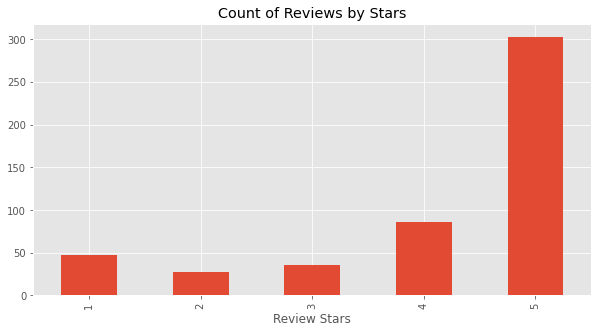

In [14]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

# Using VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
1. Stop words are removed like 'and', 'the', etc.
2. Each word is scored and combined to a total score.

In [26]:
sia = SentimentIntensityAnalyzer()

In [27]:
# Example
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [29]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [34]:
vaders = pd.DataFrame(res).T # Converting the results to a dataframe
vaders = vaders.reset_index().rename(columns={'index': 'Id'}) # Renaming the columns so that its easy to merge with the main df
vaders = vaders.merge(df, how='left') # Merging with the main dataframe

In [35]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,194729,0.041,0.666,0.292,0.9152,B001MNAOPU,AGT5O56N4TLZY,C. Poore,0,0,5,1294617600,Works for me,I really love this tea. It tastes good and ev...
1,538216,0.092,0.681,0.227,0.9702,B0061IUIDY,A1XG1W04F0M9QT,"DAC ""Thehappynappybookseller""",0,0,4,1340064000,"Great Aroma, And Flavor",This is my first nonw book review but when Ama...
2,463074,0.000,0.793,0.207,0.8885,B000CQG8AS,A32NC24OM6MGHL,"A. Chen ""IT guy""",1,1,5,1238716800,Great caffeine laden tea,I've been drinking this Stash jasmine blossom ...
3,550562,0.069,0.645,0.285,0.9008,B003UIFL0S,A2P745KK08LUK5,Spunkey,2,2,5,1312934400,can't eat just one,I have always loved these since my childhood. ...
4,34928,0.035,0.901,0.065,0.2244,B002DLXXHG,A2MZWXKOGSPKW1,J. Fan,0,0,2,1267401600,Salty and dry!,"Compared to Pacific Gold beef jerky, this beef..."


# Plotting the Results

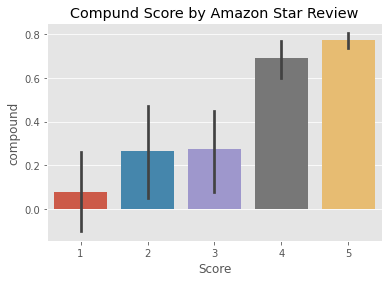

In [36]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

We can see that a 1-star review has a lower compound score and 5-star reviews have the highest, just like we expected

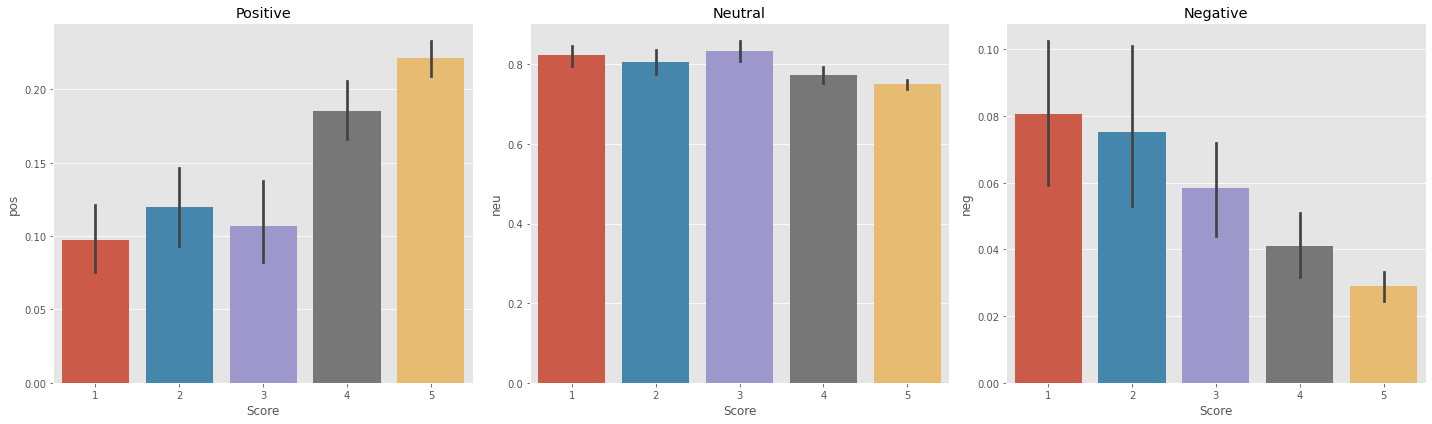

In [44]:
# Breaking the above graph from compound to individual pos, neu and neg scores
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

This confirms what we anticipated